In [66]:
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
import numpy as np
import warnings

warnings.filterwarnings("ignore")
sns.set_theme()

In [5]:
column_names = [
    "age",
    "sex",
    "chest_pain_type",
    "bp",
    "cholesterol",
    "fbs_over_120",
    "ekg_results",
    "max_hr",
    "exercise_angina",
    "st_depression",
    "slope_of_st",
    "number_of_vessels_fluro",
    "thallium",
    "heart_disease"
]

int_column_names = column_names.copy()
int_column_names.remove('st_depression')
path = r"C:\Users\Lucas\.cache\kagglehub\datasets\rishidamarla\heart-disease-prediction\versions\1"

In [6]:
column_names

['age',
 'sex',
 'chest_pain_type',
 'bp',
 'cholesterol',
 'fbs_over_120',
 'ekg_results',
 'max_hr',
 'exercise_angina',
 'st_depression',
 'slope_of_st',
 'number_of_vessels_fluro',
 'thallium',
 'heart_disease']

In [7]:
os.listdir(path)

['Heart_Disease_Prediction.csv']

In [8]:
df = pd.DataFrame(pd.read_csv(path+"\\Heart_Disease_Prediction.csv"))
df.columns = column_names
df['heart_disease'] = np.where(df['heart_disease'] == "Presence",1,0)
df['st_depression'] = df['st_depression'].astype('float32')
df[int_column_names] = df[int_column_names].astype('int16')
df.head()

,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
chest_pain_type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
bp,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
fbs_over_120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
ekg_results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
max_hr,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
exercise_angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
st_depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      270 non-null    int16  
 1   sex                      270 non-null    int16  
 2   chest_pain_type          270 non-null    int16  
 3   bp                       270 non-null    int16  
 4   cholesterol              270 non-null    int16  
 5   fbs_over_120             270 non-null    int16  
 6   ekg_results              270 non-null    int16  
 7   max_hr                   270 non-null    int16  
 8   exercise_angina          270 non-null    int16  
 9   st_depression            270 non-null    float32
 10  slope_of_st              270 non-null    int16  
 11  number_of_vessels_fluro  270 non-null    int16  
 12  thallium                 270 non-null    int16  
 13  heart_disease            270 non-null    int16  
dtypes: float32(1), int16(13)
m

In [18]:
# plt.figure(figsize=(10,8))
# pivot_table = df.pivot_table(index="age", columns="heart_disease", aggfunc="size", fill_value=0)
# sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")

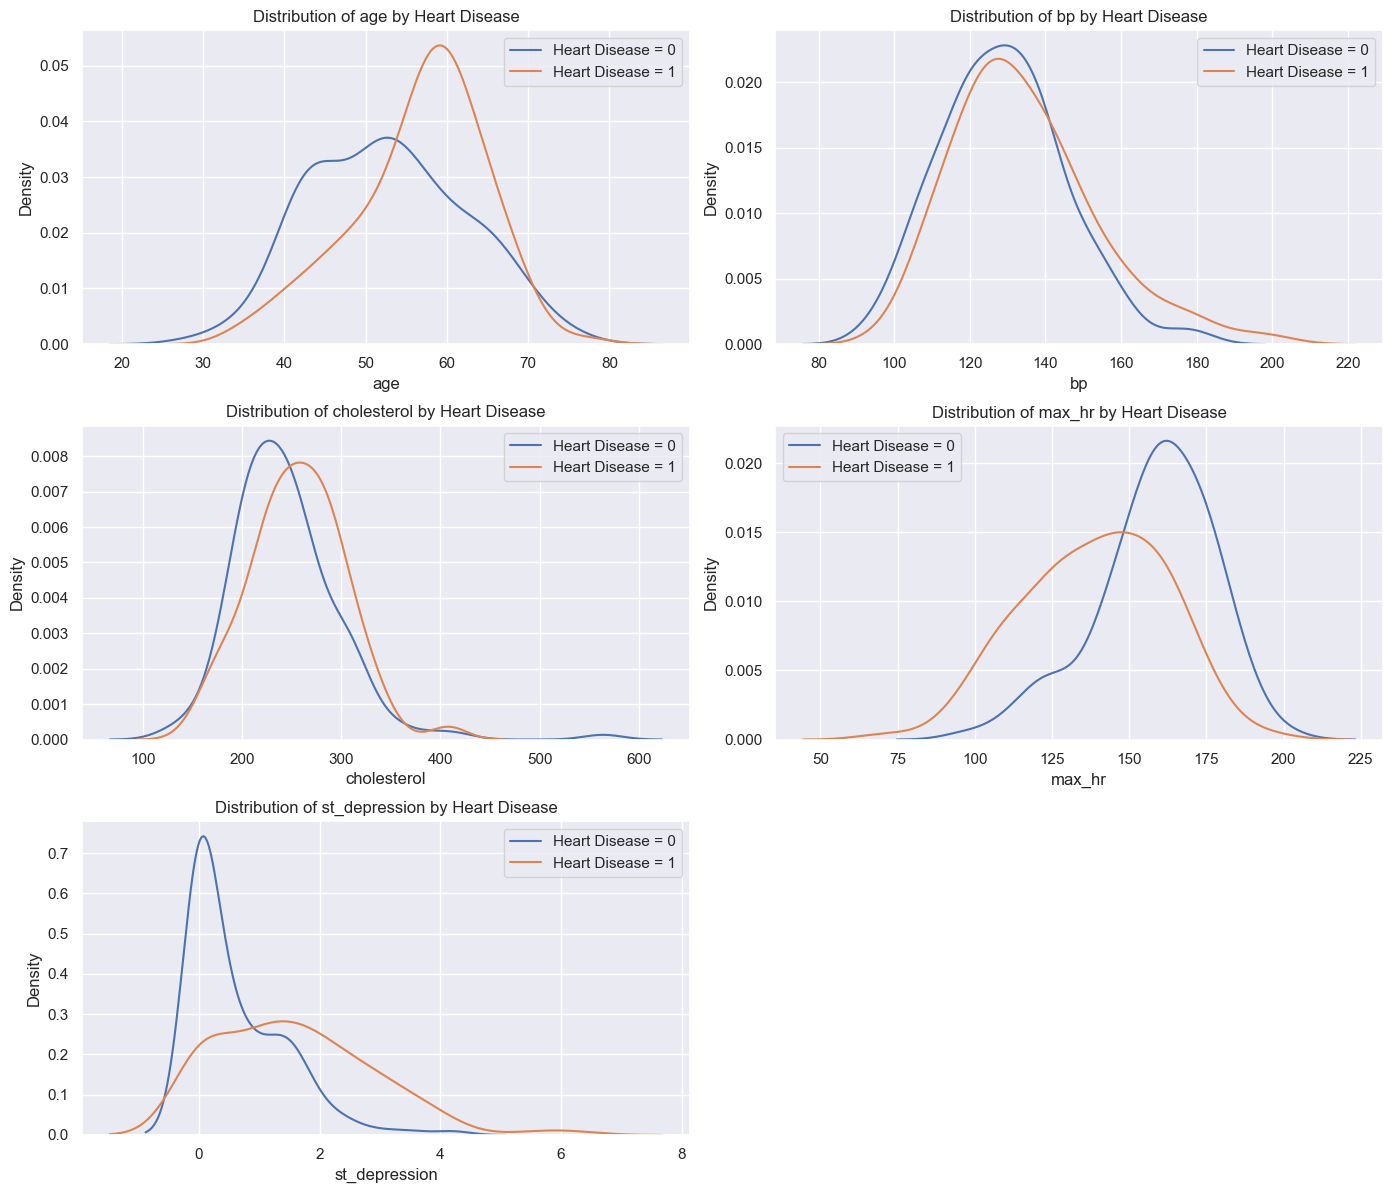

In [38]:
# Define the continuous columns to plot
columns = ["age", "bp", "cholesterol", "max_hr", "st_depression"]

# Calculate the number of rows and columns for the subplots grid
n_rows = (len(columns) + 1) // 2  # Adjust for two columns per row

# Set up the figure and axes
fig, axes = plt.subplots(n_rows, 2, figsize=(14, 4 * n_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each column and plot on a subplot
for i, col in enumerate(columns):
    sns.kdeplot(df.loc[df['heart_disease'] == 0, col], label='Heart Disease = 0', ax=axes[i])
    sns.kdeplot(df.loc[df['heart_disease'] == 1, col], label='Heart Disease = 1', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Heart Disease')
    axes[i].legend()

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

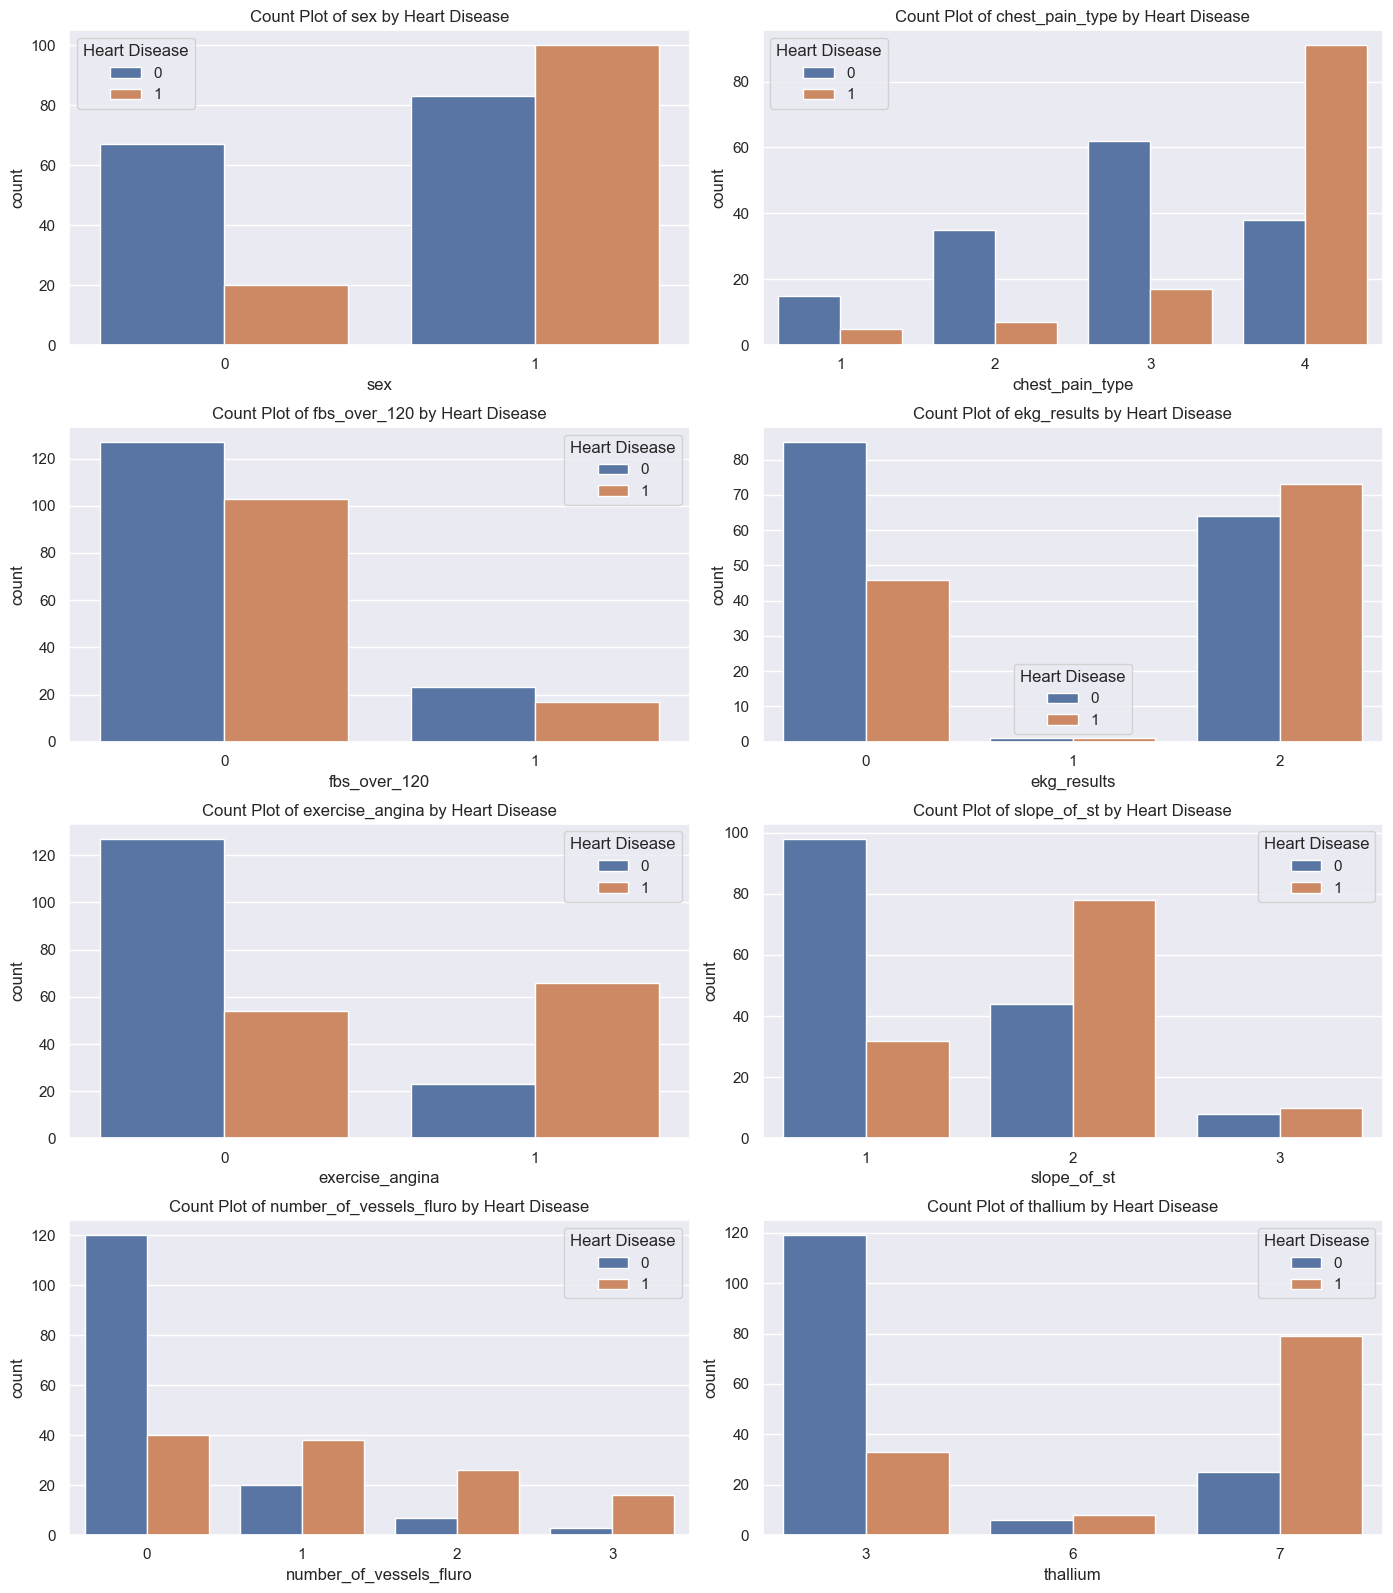

In [34]:
columns = ['sex', 'chest_pain_type', 'fbs_over_120', 'ekg_results', 
           'exercise_angina', 'slope_of_st', 'number_of_vessels_fluro', 'thallium']

# Calculate the number of rows and columns for the subplots grid
n_rows = (len(columns) + 1) // 2  # Adjust for two columns per row

# Set up the figure and axes
fig, axes = plt.subplots(n_rows, 2, figsize=(14, 4 * n_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each column and plot on a subplot
for i, col in enumerate(columns):
    sns.countplot(x=df[col], hue=df['heart_disease'], ax=axes[i])
    axes[i].set_title(f'Count Plot of {col} by Heart Disease')
    axes[i].legend(title="Heart Disease")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

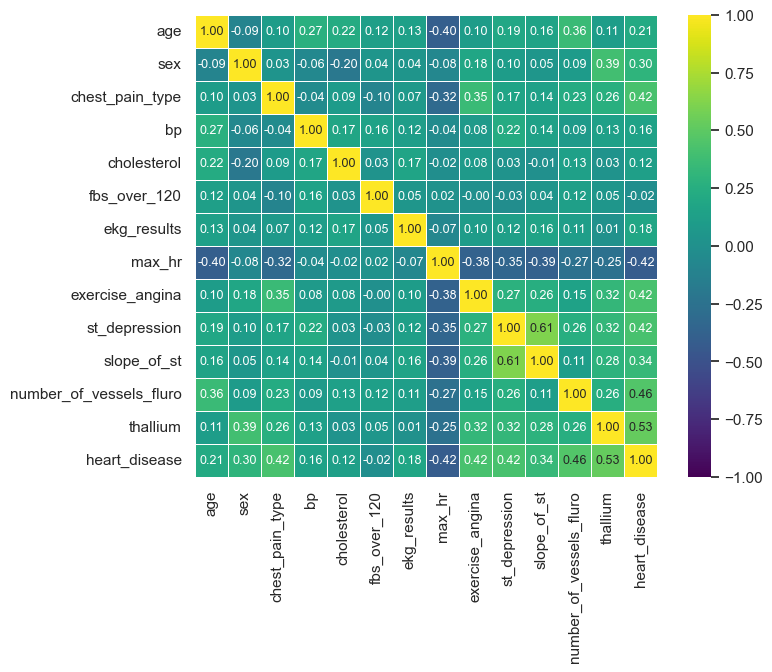

In [11]:
plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 9})
sns.heatmap(df.corr(), cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

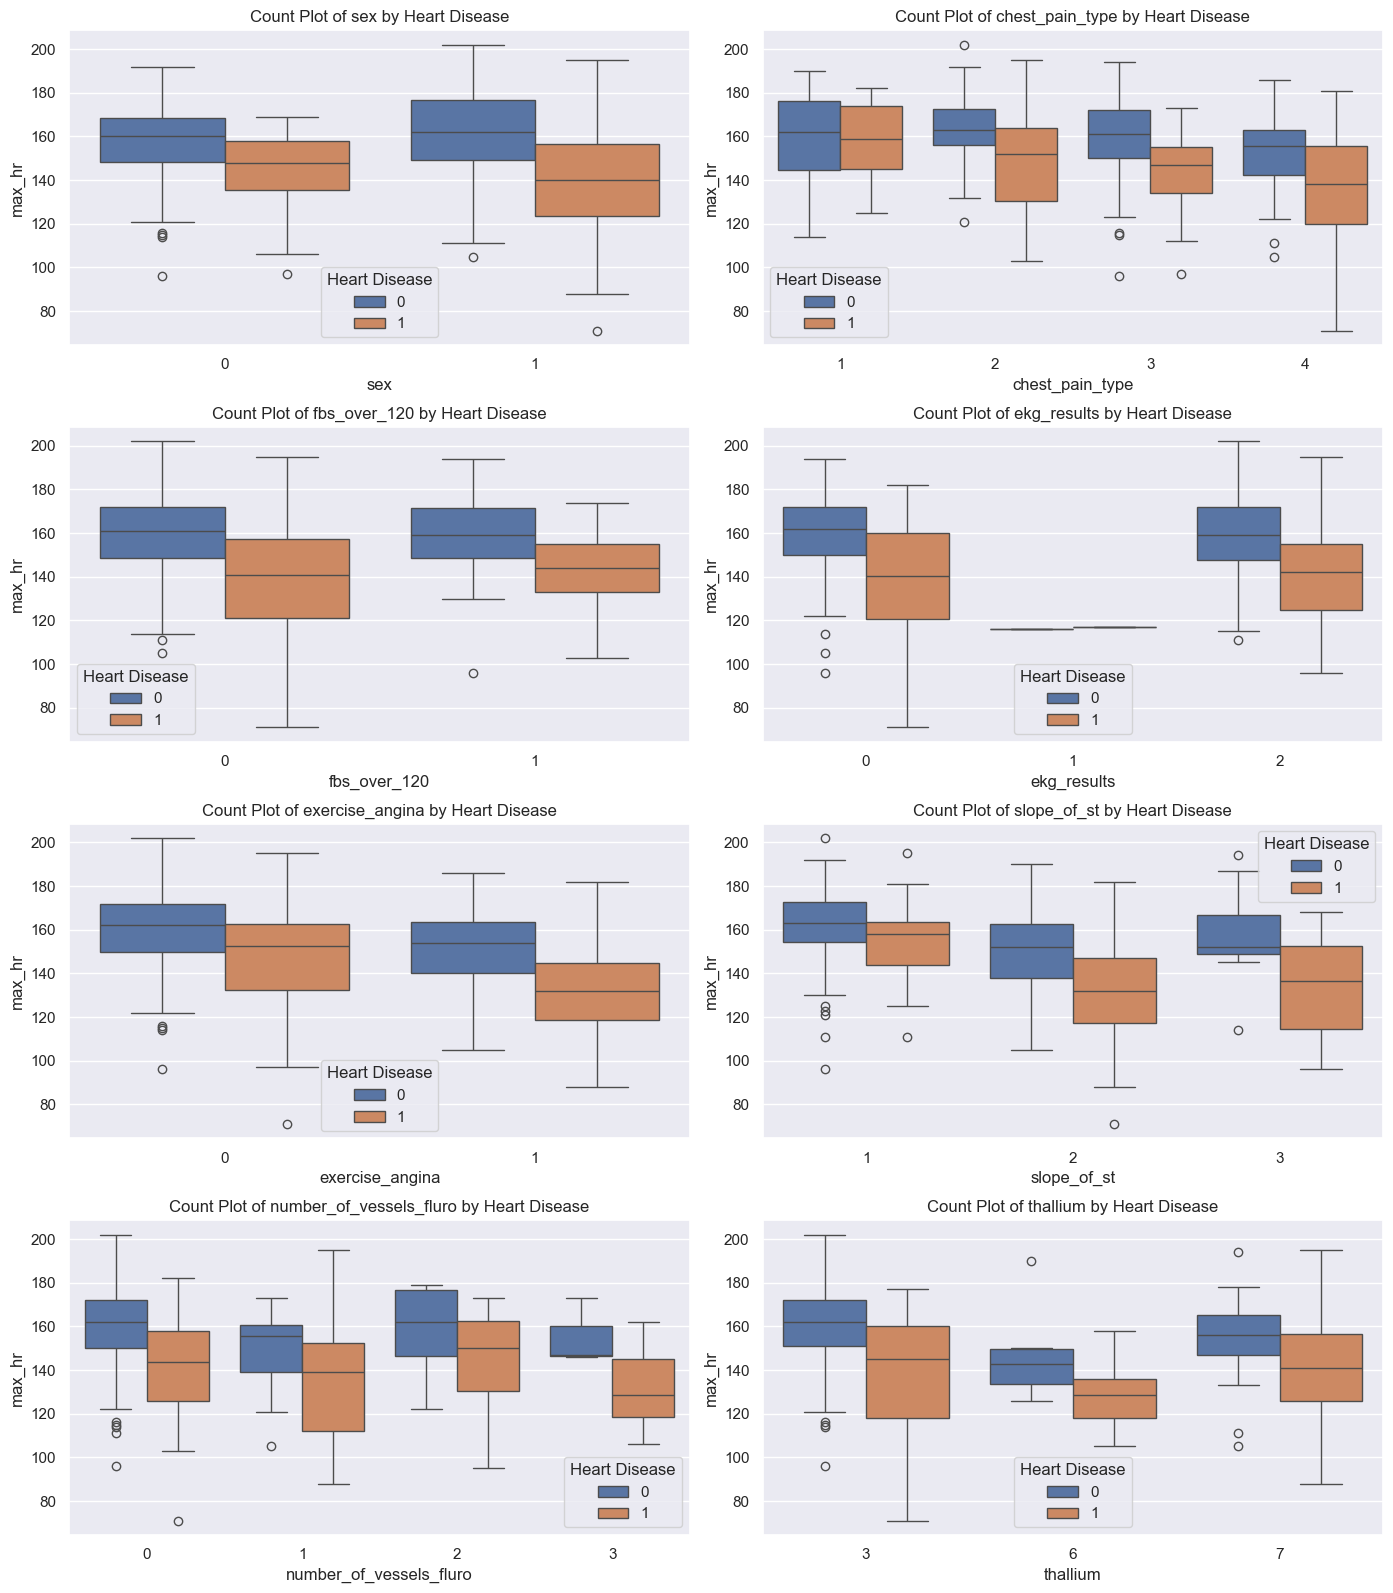

In [ ]:
columns = ['sex', 'chest_pain_type', 'fbs_over_120', 'ekg_results', 
           'exercise_angina', 'slope_of_st', 'number_of_vessels_fluro', 'thallium']

# Calculate the number of rows and columns for the subplots grid
n_rows = (len(columns) + 1) // 2  # Adjust for two columns per row

# Set up the figure and axes
fig, axes = plt.subplots(n_rows, 2, figsize=(14, 4 * n_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each column and plot on a subplot
for i, col in enumerate(columns):
    sns.boxplot(x=df[col],y=df['max_hr'], hue=df['heart_disease'], ax=axes[i])
    axes[i].set_title(f'Count Plot of {col} by Heart Disease')
    axes[i].legend(title="Heart Disease")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

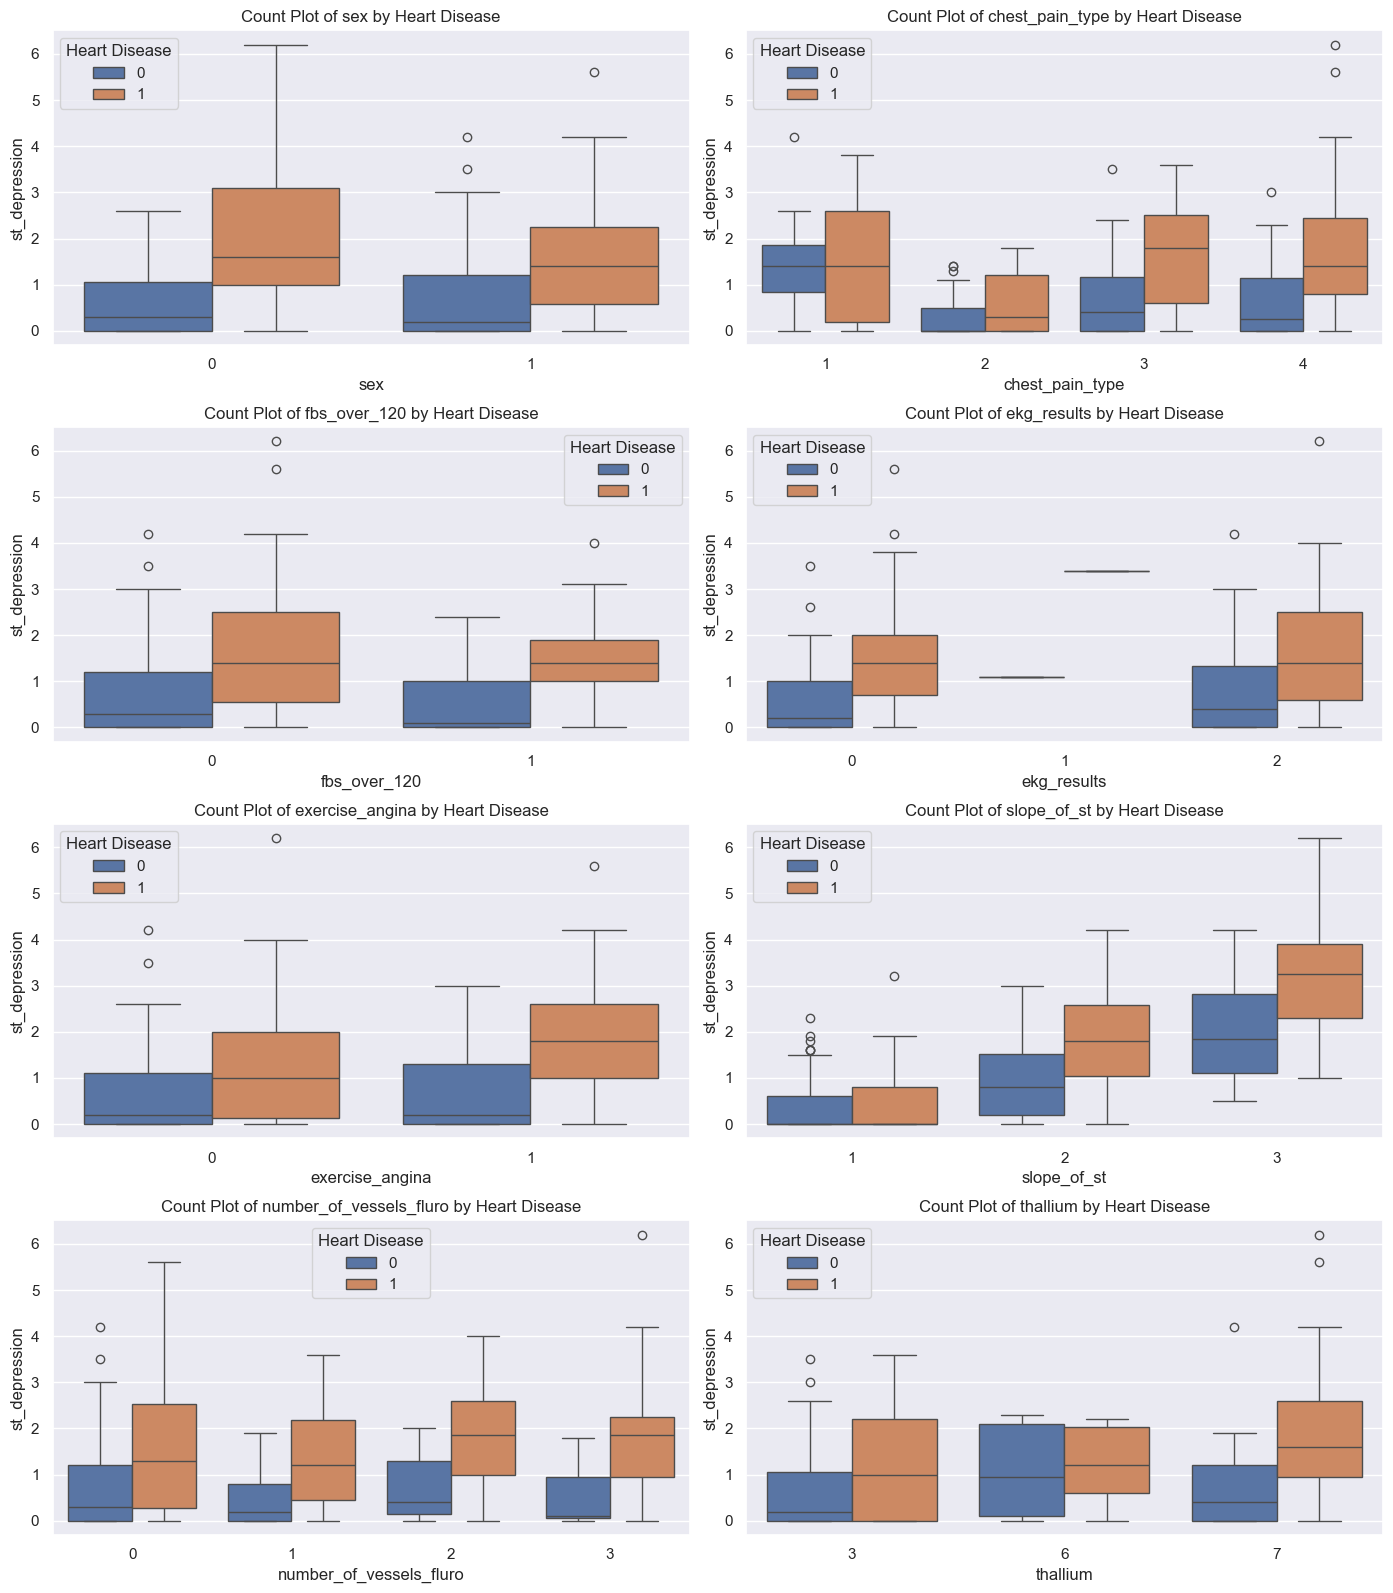

In [ ]:
columns = ['sex', 'chest_pain_type', 'fbs_over_120', 'ekg_results', 
           'exercise_angina', 'slope_of_st', 'number_of_vessels_fluro', 'thallium']

# Calculate the number of rows and columns for the subplots grid
n_rows = (len(columns) + 1) // 2  # Adjust for two columns per row

# Set up the figure and axes
fig, axes = plt.subplots(n_rows, 2, figsize=(14, 4 * n_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each column and plot on a subplot
for i, col in enumerate(columns):
    sns.boxplot(x=df[col],y=df['st_depression'], hue=df['heart_disease'], ax=axes[i])
    axes[i].set_title(f'Count Plot of {col} by Heart Disease')
    axes[i].legend(title="Heart Disease")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [58]:
xtrain, xval, ytrain, yval = train_test_split(df.drop(columns='heart_disease'), df['heart_disease'], test_size=0.2, random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)

In [73]:
pipeline = Pipeline([('poly', PolynomialFeatures(2)),
                     ('scaler', StandardScaler()),
                     ('logit', LogisticRegression())])

logit = LogisticRegression()
logit.fit(pipeline.fit_transform(xtrain), ytrain)
y_pred = logit.predict(pipeline.transform(xtest))
accuracy_score(ytest,y_pred)

0.8181818181818182